In [1]:
import pandas as pd

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [2]:
y = pd.read_csv("AAPL_quarterly_financials.csv")

In [3]:
y.index = y.name

In [4]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [5]:
y.index = pd.to_datetime(y.index)

In [6]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)

# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [7]:
from pytrends.request import TrendReq

In [8]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
# keywords = ["iPhone", "Recession", "Samsung", "Interest Rates", "New Phone", "Buy iPhone", "Sell iPhone"]
keywords = ["MacBook", "Batterygate", "Pandemic", "Apple patent case", "AppleTV", "Xiaomi", "Semiconductor", "Justin Bieber", "Helicopter", "UCLA"] 
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [9]:
df = df.resample("Q").mean()

In [10]:
# ALIGN DATA
temp = pd.concat([y, df],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

In [11]:
len(y)

79

In [12]:
len(X)

79

# 3.) Normalize all the X data

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
X_scaled = scaler.fit_transform(X)

In [16]:
len(X_scaled)

79

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [17]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

In [18]:
lasso = Lasso(alpha = .5)

In [19]:
lasso.fit(X_scaled, y)

Lasso(alpha=0.5)

In [20]:
coefficients = lasso.coef_

In [21]:
coefficients

array([ 0.,  0.,  0., -0.,  0.,  0., -0., -0., -0., -0.])

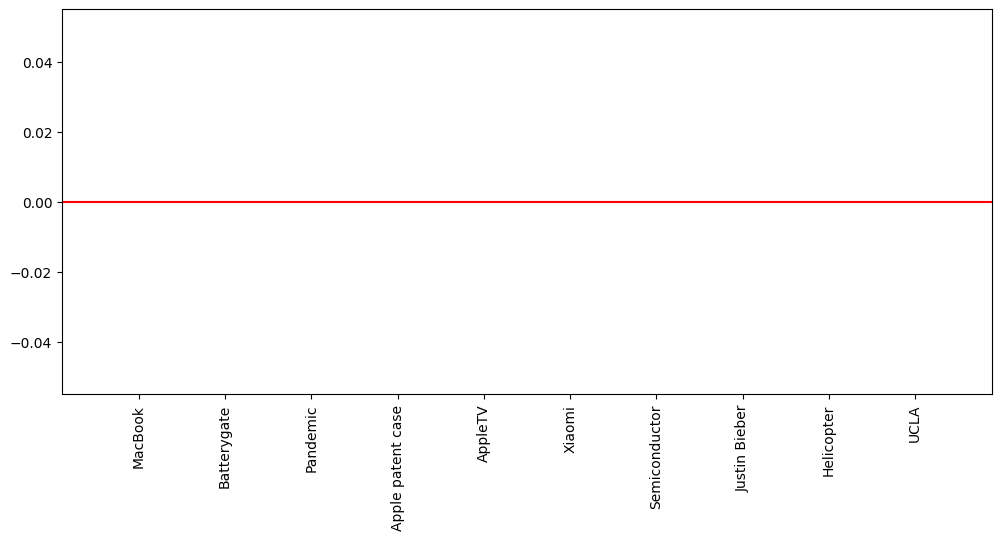

In [22]:
import matplotlib.pyplot as plt

# Assuming 'coefficients' is a list or array of coefficient values
# 'column_names' should be a list of column names corresponding to the coefficients
column_names = ["MacBook", "Batterygate", "Pandemic", "Apple patent case", "AppleTV", "Xiaomi", "Semiconductor", "Justin Bieber", "Helicopter", "UCLA"]  # Replace with actual column names
# column_names = ["iPhone", "Recession", "Samsung", "Interest Rates", "New Phone", "Buy iPhone", "Sell iPhone"]  # Replace with actual column names

plt.figure(figsize=(12, 5))
plt.bar(range(len(coefficients)), coefficients)
plt.xticks(range(len(coefficients)), column_names, rotation='vertical')
plt.axhline(0, color="red")
plt.show()


# 5.) Do these coefficient magnitudes make sense?

As we would expect the first few keywords might contribute to the model, the results doe not make perfect sense.